## Task: Predict the outcome of a football match, based on historical match and player data.

You are provided with football matches dataset. This dataset includes historical match outcomes, player statistics, and other relevant factors. Your objective is to develop a multiclass classification model that accurately predicts the result of a football match: "home win", "away win", or "draw".

Your target is the column: "Score".

You are provided with the code to download and load the csv file.

Your work will be evaluated based on the completion of the following tasks:

Tasks:
> *  EDA & Preprocessing: You should check the following points and ADD COMMENTS about your findings:
>   
>    1- Imbalance.
>    
>    2- Missing values.
>    
>    3- Duplicates.
>    
>    4- Categorical values.
> * Baseline: Create a majority class baseline.
> * Build a ML model: Train and evaluate using K-Fold (K=5) without shuffling, and with F1 Score as the metric.
> * Plot the features importance of your model.
> * Performance: Achieve F1 Score ≥ 0.5
> * (Bonus): Use "VotingClassifier" from sklearn with parameter voting="soft" to combine more than one model together then print the score (Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html)

Note: You are allowed to use any models or libraries you want.

In [1]:
import gdown
import pandas as pd

url = 'https://drive.google.com/file/d/15R3R4O7CJdtnV8AhIDLYvtNoRtROf6dk/view?usp=sharing'

file_id = url.split('/')[-2]

download_url = f'https://drive.google.com/uc?id={file_id}'

output = 'downloaded_file.csv'
gdown.download(download_url, output, quiet=False)

df = pd.read_csv('downloaded_file.csv')

Downloading...
From: https://drive.google.com/uc?id=15R3R4O7CJdtnV8AhIDLYvtNoRtROf6dk
To: /content/downloaded_file.csv
100%|██████████| 122k/122k [00:00<00:00, 42.5MB/s]


In [3]:
df.head()

,Season,Home Team,Away Team,Score,Month,Year,WeekOfYear,TotalShotsPerHomeTeam,TotalSoTPerHomeTeam,TotalPassesPerHomeTeam,...,AccurPerHalf1Away,AccurPerHalf2Away,InaccurPerHalf1Away,InaccurPerHalf2Away,AccurPassesPerHalf1Away,AccurPassesPerHalf2Away,ShotsHalf1_diff,ShotsHalf2_diff,SoTHalf1_diff,SoTHalf2_diff
0,1,Antennae,Andromeda,Away win,2,2017,46,8.0,2.0,340.0,...,271.0,162.0,43.0,32.0,0.8633,0.8350,1.0,2.0,0.0,1.0
1,1,Andromeda,Antennae,Draw,9,2016,258,5.0,1.0,443.0,...,174.0,212.0,31.0,45.0,0.8486,0.8247,0.0,-5.0,0.0,1.0
2,1,Andromeda,Butterfly,Away win,12,2016,347,3.0,0.0,669.0,...,185.0,94.0,60.0,49.0,0.7550,0.6570,0.0,-3.0,-1.0,-1.0
3,1,Andromeda,Cigar,Away win,1,2017,25,5.0,2.0,384.0,...,174.0,179.0,46.0,47.0,0.7910,0.7920,-2.0,-4.0,-1.0,0.0
4,1,Andromeda,Circinus,Home Win,8,2016,237,13.0,2.0,542.0,...,237.0,215.0,55.0,59.0,0.8115,0.7847,4.0,4.0,0.0,2.0


Good luck in the exam x)

Prepared by: Mohamed Eltayeb


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 55 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Season                   412 non-null    int64  
 1   Home Team                412 non-null    object 
 2   Away Team                412 non-null    object 
 3   Score                    412 non-null    object 
 4   Month                    412 non-null    int64  
 5   Year                     412 non-null    int64  
 6   WeekOfYear               412 non-null    int64  
 7   TotalShotsPerHomeTeam    412 non-null    float64
 8   TotalSoTPerHomeTeam      412 non-null    float64
 9   TotalPassesPerHomeTeam   412 non-null    float64
 10  TotalAccurPerHomeTeam    412 non-null    float64
 11  TotalInaccurPerHomeTeam  412 non-null    float64
 12  TotalShotsPerAwayTeam    412 non-null    float64
 13  TotalSoTPerAwayTeam      412 non-null    float64
 14  TotalPassesPerAwayTeam   4

Target Distribution:
Score
Home Win    0.398058
Draw        0.327670
Away win    0.274272
Name: proportion, dtype: float64


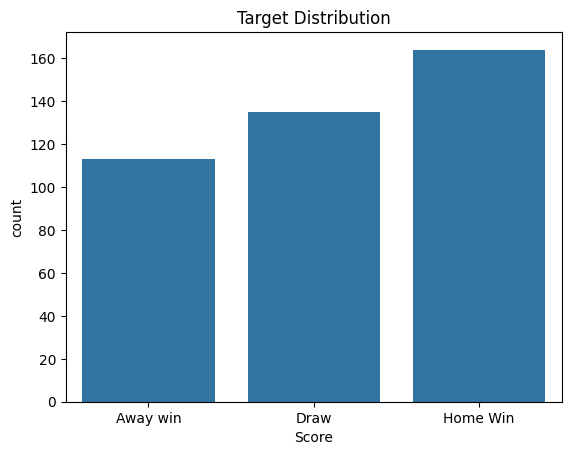

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

def check_target_imbalance(df, target_column):
    print("Target Distribution:")
    print(df[target_column].value_counts(normalize=True))
    sns.countplot(x=df[target_column])
    plt.title("Target Distribution")
    plt.show()

check_target_imbalance(df, "Score")

In [12]:
def check_missing_values(df):
    missing_values = df.isnull().sum()
    print("Missing Values per Column:")
    print(missing_values[missing_values > 0])
    if missing_values.any():
        print("\nHandle Missing Values as needed.")
    else:
        print("\nNo Missing Values Found.")

check_missing_values(df)

Missing Values per Column:
Series([], dtype: int64)

No Missing Values Found.


In [14]:
def encode_categorical_columns(df):
    categorical_cols = df.select_dtypes(include=["object"]).columns
    print("Categorical Columns:", list(categorical_cols))

label_encoders = encode_categorical_columns(df)

Categorical Columns: ['Home Team', 'Away Team', 'Score']


In [15]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    print(f"Encoding column: {col}")
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
df

Encoding column: Home Team
Encoding column: Away Team
Encoding column: Score


,Season,Home Team,Away Team,Score,Month,Year,WeekOfYear,TotalShotsPerHomeTeam,TotalSoTPerHomeTeam,TotalPassesPerHomeTeam,...,AccurPerHalf1Away,AccurPerHalf2Away,InaccurPerHalf1Away,InaccurPerHalf2Away,AccurPassesPerHalf1Away,AccurPassesPerHalf2Away,ShotsHalf1_diff,ShotsHalf2_diff,SoTHalf1_diff,SoTHalf2_diff
0,1,1,0,0,2,2017,46,8.0,2.0,340.0,...,271.0,162.0,43.0,32.0,0.8633,0.8350,1.0,2.0,0.0,1.0
1,1,0,1,1,9,2016,258,5.0,1.0,443.0,...,174.0,212.0,31.0,45.0,0.8486,0.8247,0.0,-5.0,0.0,1.0
2,1,0,3,0,12,2016,347,3.0,0.0,669.0,...,185.0,94.0,60.0,49.0,0.7550,0.6570,0.0,-3.0,-1.0,-1.0
3,1,0,5,0,1,2017,25,5.0,2.0,384.0,...,174.0,179.0,46.0,47.0,0.7910,0.7920,-2.0,-4.0,-1.0,0.0
4,1,0,6,2,8,2016,237,13.0,2.0,542.0,...,237.0,215.0,55.0,59.0,0.8115,0.7847,4.0,4.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,1,14,12,0,8,2016,241,4.0,0.0,556.0,...,190.0,157.0,40.0,47.0,0.8260,0.7695,-4.0,-2.0,-1.0,-2.0
408,1,12,14,2,2,2017,50,15.0,5.0,503.0,...,208.0,130.0,36.0,36.0,0.8525,0.7830,4.0,2.0,2.0,2.0
409,1,12,15,2,10,2016,297,14.0,4.0,437.0,...,115.0,148.0,41.0,42.0,0.7373,0.7790,1.0,1.0,1.0,1.0
410,1,13,14,1,8,2017,228,14.0,5.0,561.0,...,186.0,149.0,31.0,37.0,0.8570,0.8013,6.0,2.0,1.0,0.0


In [16]:
def check_duplicates(df):
    duplicates = df.duplicated().sum()
    print(f"Number of Duplicate Samples: {duplicates}")
    if duplicates > 0:
        print("Dropping Duplicates...")
        df.drop_duplicates(inplace=True)
        print("Duplicates Dropped.")
    else:
        print("No Duplicate Samples Found.")

check_duplicates(df)

Number of Duplicate Samples: 0
No Duplicate Samples Found.


In [19]:
from sklearn.preprocessing import MinMaxScaler
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns.drop("Score")  ### DON'T SCALE THE TARGET
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df

,Season,Home Team,Away Team,Score,Month,Year,WeekOfYear,TotalShotsPerHomeTeam,TotalSoTPerHomeTeam,TotalPassesPerHomeTeam,...,AccurPerHalf1Away,AccurPerHalf2Away,InaccurPerHalf1Away,InaccurPerHalf2Away,AccurPassesPerHalf1Away,AccurPassesPerHalf2Away,ShotsHalf1_diff,ShotsHalf2_diff,SoTHalf1_diff,SoTHalf2_diff
0,0.0,0.055556,0.000000,0,0.090909,0.5,0.123944,0.25000,0.2,0.167665,...,0.599369,0.365188,0.315789,0.133333,0.823345,0.804776,0.52,0.566667,0.545455,0.571429
1,0.0,0.000000,0.055556,1,0.727273,0.0,0.721127,0.15625,0.1,0.321856,...,0.293375,0.535836,0.105263,0.350000,0.772125,0.774030,0.48,0.333333,0.545455,0.571429
2,0.0,0.000000,0.166667,0,1.000000,0.0,0.971831,0.09375,0.0,0.660180,...,0.328076,0.133106,0.614035,0.416667,0.445993,0.273433,0.48,0.400000,0.454545,0.428571
3,0.0,0.000000,0.277778,0,0.000000,0.5,0.064789,0.15625,0.2,0.233533,...,0.293375,0.423208,0.368421,0.383333,0.571429,0.676418,0.40,0.366667,0.454545,0.500000
4,0.0,0.000000,0.333333,2,0.636364,0.0,0.661972,0.40625,0.2,0.470060,...,0.492114,0.546075,0.526316,0.583333,0.642857,0.654627,0.64,0.633333,0.545455,0.642857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,0.0,0.777778,0.666667,0,0.636364,0.0,0.673239,0.12500,0.0,0.491018,...,0.343849,0.348123,0.263158,0.383333,0.693380,0.609254,0.32,0.433333,0.454545,0.357143
408,0.0,0.666667,0.777778,2,0.090909,0.5,0.135211,0.46875,0.5,0.411677,...,0.400631,0.255973,0.192982,0.200000,0.785714,0.649552,0.64,0.566667,0.727273,0.642857
409,0.0,0.666667,0.833333,2,0.818182,0.0,0.830986,0.43750,0.4,0.312874,...,0.107256,0.317406,0.280702,0.300000,0.384321,0.637612,0.52,0.533333,0.636364,0.571429
410,0.0,0.722222,0.777778,1,0.636364,0.5,0.636620,0.43750,0.5,0.498503,...,0.331230,0.320819,0.105263,0.216667,0.801394,0.704179,0.72,0.566667,0.636364,0.500000


In [25]:
x = df.drop("Score", axis = 1)
y = df["Score"]

x.head()
print("x shape = ", x.shape)

x shape =  (412, 54)


In [27]:

print(y)
print("y shape = ", y.shape)

0      0
1      1
2      0
3      0
4      2
      ..
407    0
408    2
409    2
410    1
411    2
Name: Score, Length: 412, dtype: int64
y shape =  (412,)


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
import numpy as np

In [32]:
model = LogisticRegression()

kFold = StratifiedKFold(n_splits=5, shuffle = False)

In [35]:
f1_score_lst = []

for train_index, test_index in kFold.split(x,y):
        X_train, X_test = x.loc[train_index, :], x.loc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)

        yhat = model.predict(X_test)

        f1 = f1_score(y_test, yhat, average = 'weighted')
        f1_score_lst.append(f1)

print(f'Model\'s F1 Score = {np.mean(f1_score_lst):.4f}')

Model's F1 Score = 0.5128


In [45]:
 print(y.value_counts())
 print(y.value_counts().idxmax())

Score
2    164
1    135
0    113
Name: count, dtype: int64
2


In [48]:
# Calculate the majority class baseline
majority_class = y.value_counts().idxmax()
baseline_pred = [majority_class] * len(y)

baseline_f1 = f1_score(y, baseline_pred, average='weighted')
print(f"Baseline F1-Score (majority class): {baseline_f1:.4f}")

Baseline F1-Score (majority class): 0.2267


In [54]:
logistic_importance = list(zip(x.columns, model.coef_[0]))
logistic_importance

[('Season', 0.05858453131582862),
 ('Home Team', -0.37804694206277667),
 ('Away Team', -0.11382842801269152),
 ('Month', -0.11630555117973787),
 ('Year', -0.012356800470231657),
 ('WeekOfYear', 0.010769099200241501),
 ('TotalShotsPerHomeTeam', 0.15272981862864046),
 ('TotalSoTPerHomeTeam', -0.11651597806033547),
 ('TotalPassesPerHomeTeam', 0.01111979935572992),
 ('TotalAccurPerHomeTeam', -0.048234310208565466),
 ('TotalInaccurPerHomeTeam', 0.3787918200827089),
 ('TotalShotsPerAwayTeam', -0.11935169569555809),
 ('TotalSoTPerAwayTeam', 0.01410212540606748),
 ('TotalPassesPerAwayTeam', -0.13770389935521563),
 ('TotalAccurPerAwayTeam', -0.07589720056446302),
 ('TotalInaccurPerAwayTeam', -0.38486636762995274),
 ('ShotsHomeAway_diff', 0.17330651080504156),
 ('SoTHomeAway_diff', -0.06450096018910269),
 ('TotalShotsPerMatch', 0.05328803056873781),
 ('TotalSoTPerMatch', -0.07315275189590563),
 ('TotalPassesPerMatch', -0.06746435696180353),
 ('TotalAccurPerMatch', -0.06975608832218325),
 ('Total

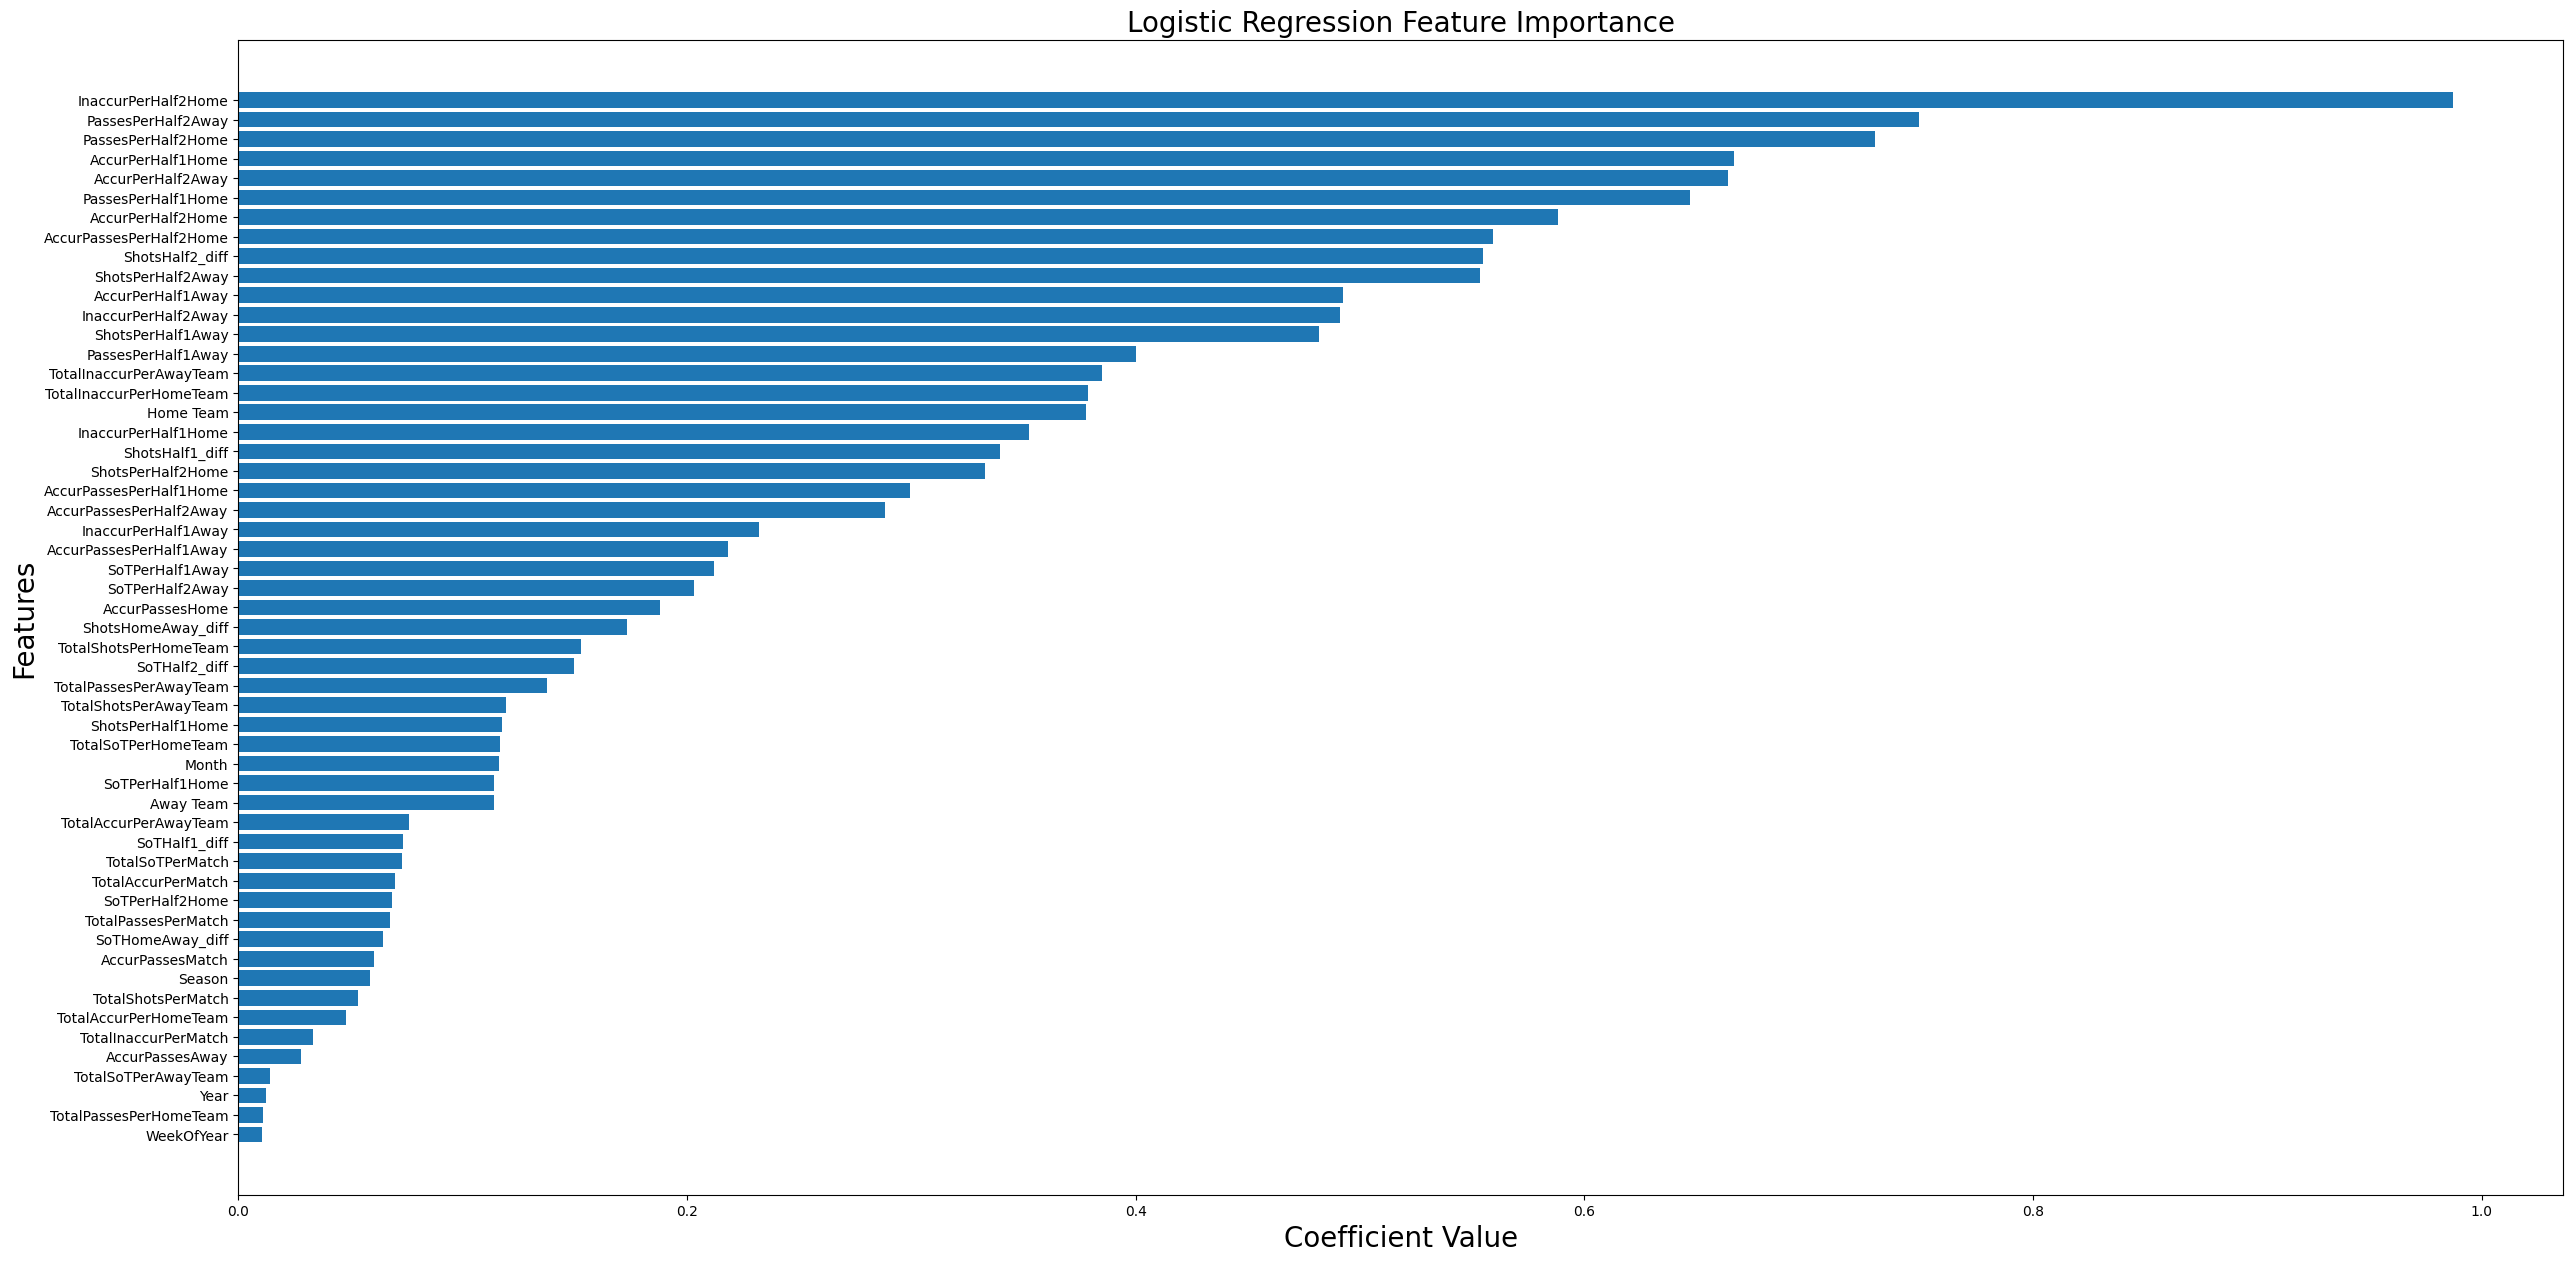

In [74]:
sorted_logistic_importance = sorted(logistic_importance, key=lambda x: abs(x[1]), reverse=True)
features, coefficients = zip(*sorted_logistic_importance)

plt.figure(figsize=(30, 15))
plt.barh(features, np.abs(coefficients))
plt.xlabel('Coefficient Value', fontsize = 20)
plt.ylabel('Features', fontsize = 20)
plt.title('Logistic Regression Feature Importance', fontsize = 20)
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.show()
